In [1]:
import inference_gym.using_jax as gym
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from src.samplers import samplers


In [2]:
samples, metadata = samplers['nuts'](return_samples=True)(
        model=gym.targets.Banana(), 
        num_steps=1000,
        initial_position=jnp.ones(2), 
        key=jax.random.PRNGKey(0))


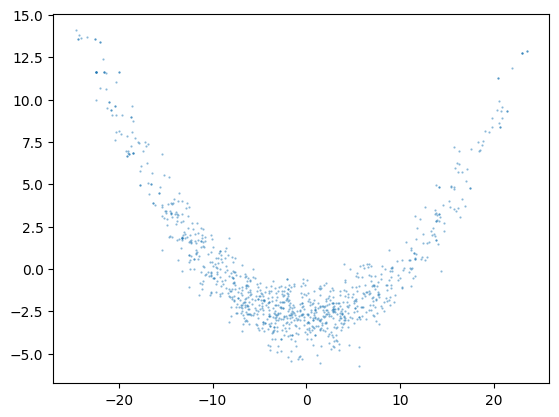

In [3]:
# scatter plot of samples
plt.scatter(samples[:,0], samples[:,1], alpha=0.5, s=0.3)

In [4]:
import itertools
import itertools
import inference_gym.using_jax as gym
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
sys.path.append('.')
from src.samplers import samplers
from src.models import models
from src.ess import evaluate_sampler
import pandas as pd


key = jax.random.PRNGKey(0)
results = []

for i, (sampler, model) in enumerate(itertools.product(samplers, models)):

    err_t_mean_max, grads_to_low_max, err_t_mean_avg, grads_to_low_avg, expectation = evaluate_sampler(sampler=samplers[sampler](),model=models[model], num_steps=10000, batch_size=128, key=key, pvmap=jax.vmap)
    
    # Append the results to the list
    results.append({
        'Sampler': sampler,
        'Model': model,
        'Grad evaluations to low error (avg)': grads_to_low_avg
    })

# Create the DataFrame
df = pd.DataFrame(results)

In [5]:
df

,Sampler,Model,Grad evaluations to low error (avg)
0,nuts,Gaussian_10D,1469.5121
1,nuts,Banana,63337.02
2,unadjusted_microcanonical,Gaussian_10D,234.0
3,unadjusted_microcanonical,Banana,8034.0
